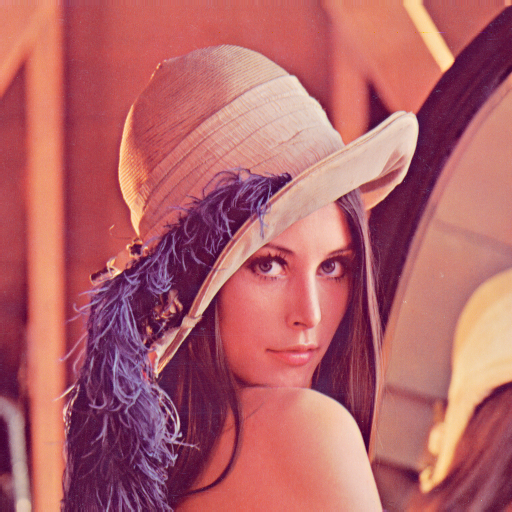

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# display image in colab
image_colored = Image . open ("/content/Lenna_(test_image).png")
display ( image_colored )

In [ ]:
# Get the size (width , height ) and channels (RGB)
width , height = image_colored . size
channels = len( image_colored . getbands () ) # For RGB , it will be 3
print ( f" Image shape (RGB): ({ height } , { width } , { channels})")
image_size_grayed = width * height *1
print ( f" Image size (RGB): { image_size_grayed }")

 Image shape (RGB): (512 , 512 , 3)
 Image size (RGB): 262144


In [ ]:
# Convert the Pillow image to a NumPy array
image_array_colored = np . array ( image_colored )
# Display the shape of the NumPy array (height , width , channels )
print (" Shape of the image array :", image_array_colored .shape )# Expected Output

 Shape of the image array : (512, 512, 3)


array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [179,  79,  86],
        [178,  78,  93],
        [174,  78,  87]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [179,  79,  86],
        [178,  78,  93],
        [174,  78,  87]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [179,  79,  86],
        [178,  78,  93],
        [174,  78,  87]],

       ...,

       [[177,  64,  79],
        [177,  64,  79],
        [163,  58,  74],
        ...,
        [177,  65,  79],
        [172,  68,  79],
        [172,  75,  83]],

       [[169,  63,  79],
        [169,  63,  79],
        [159,  53,  74],
        ...,
        [175,  70,  85],
        [178,  72,  84],
        [178,  63,  75]],

       [[166,  55,  74],
        [166,  55,  74],
        [154,  51,  71],
        ...,
        [178,  65,  78],
        [175,  67,  79],
        [177,  59,  79]]], dtype=uint8)
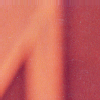

In [ ]:
# Assuming image_array_colored is your original image array with shape (512, 512, 3)
image_array = np.array(image_colored)
# Extract the top left corner (first 100 rows and 100 columns)
top_left_corner = image_array[:100, :100]
display(top_left_corner)


Shape of the image array: (100, 100, 3)


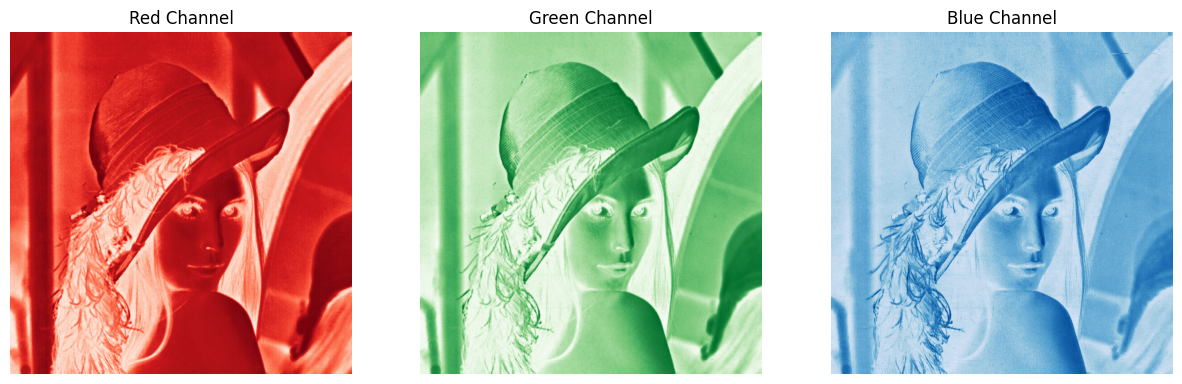

In [ ]:
# Display the shape of the NumPy array (height, width, channels)
print("Shape of the image array:", image_array_colored.shape)

# Extract Red, Green, and Blue channels
red_channel = image_array[:, :, 0]  # Red
green_channel = image_array[:, :, 1]  # Green (Fixed!)
blue_channel = image_array[:, :, 2]  # Blue

# Plot the separate color channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display Red channel
axes[0].imshow(red_channel, cmap="Reds")  # Using Reds colormap for better visualization
axes[0].set_title("Red Channel")
axes[0].axis("off")

# Display Green channel
axes[1].imshow(green_channel, cmap="Greens")  # Using Greens colormap
axes[1].set_title("Green Channel")
axes[1].axis("off")

# Display Blue channel
axes[2].imshow(blue_channel, cmap="Blues")  # Using Blues colormap
axes[2].set_title("Blue Channel")
axes[2].axis("off")

# Show the plots
plt.show()

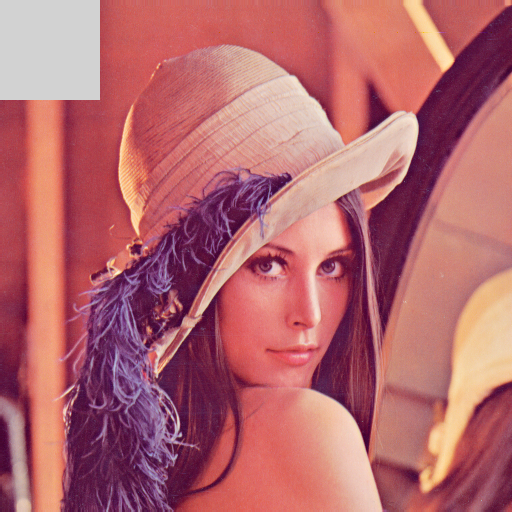

In [ ]:
image_array[0:100,0:100] =210
modified_img = Image.fromarray(image_array)
display(modified_img)

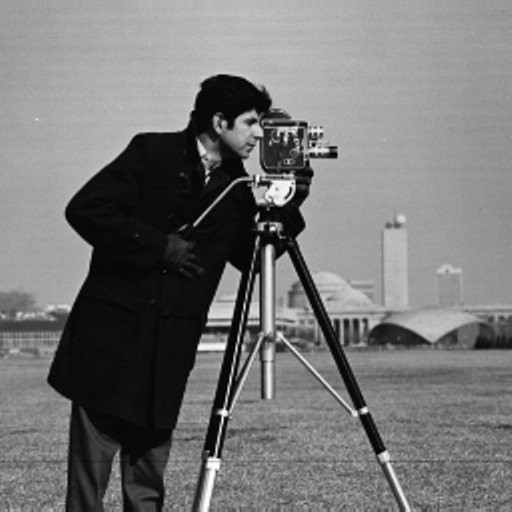

In [ ]:
grayscale_image = Image . open ("/content/cameraman.png")
display ( grayscale_image )

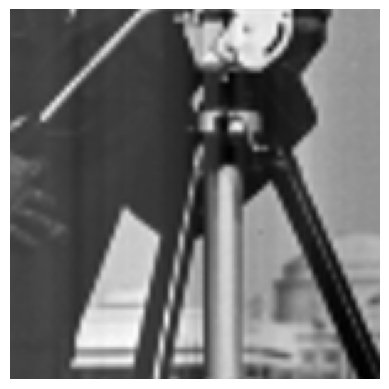

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and convert to grayscale
image = grayscale_image.convert("L")
image_array = np.array(image)

# Compute the mean of the image
mean_image = np.mean(image_array, axis=0)

# Center the data
centered_data = image_array - mean_image

# Get image dimensions
height, width = centered_data.shape

# Calculate the center coordinates
center_y, center_x = height // 2, width // 2

# Extract the middle 150x150 pixels section
cropped_image = centered_data[center_y - 75:center_y + 75, center_x - 75:center_x + 75]

# Display the cropped image
plt.imshow(cropped_image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

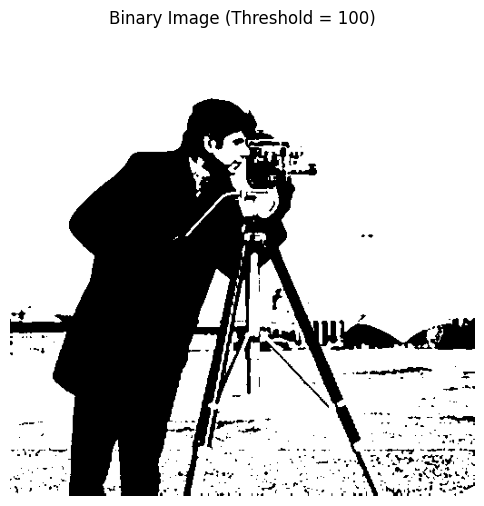

In [ ]:
# Apply the threshold to create a binary image
binary_image_array = np.where(image_array < 100, 0, 255).astype(np.uint8)

# Convert the binary array back to an image
binary_image = Image.fromarray(binary_image_array)

# Display the original and binary images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.title('Binary Image (Threshold = 100)')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

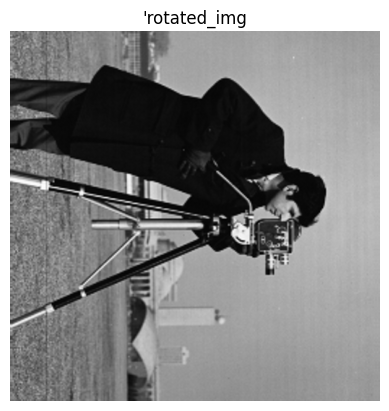

In [ ]:
rotated_img = np.rot90(grayscale_image, k=-1)
plt.imshow(rotated_img, cmap="gray")
plt.title("'rotated_img");
plt.axis("off")
plt.show()

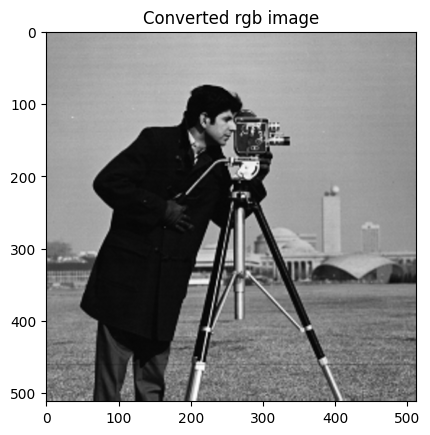

In [ ]:
rgb_img = np.stack([grayscale_image]*3, axis=-1)
plt.imshow(rgb_img)
plt.title("Converted rgb image")
plt.show()

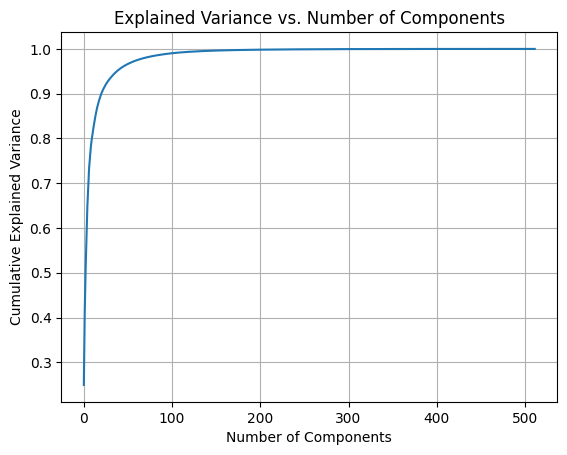

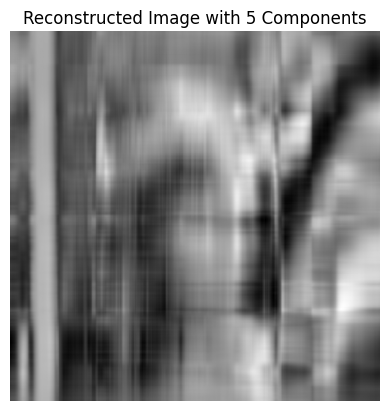

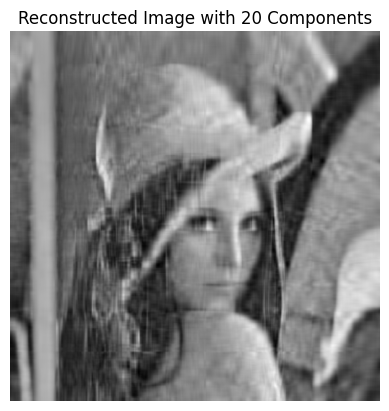

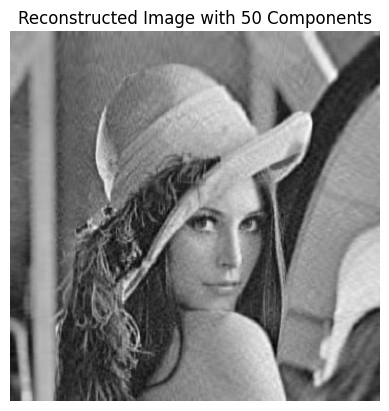

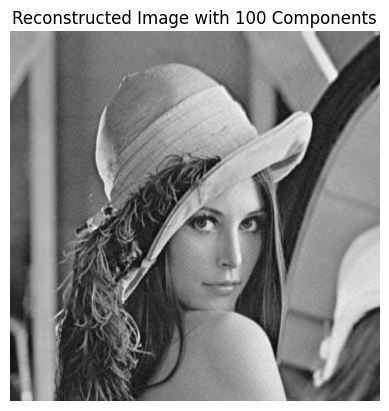

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and convert it to grayscale
image_path = "/content/Lenna_(test_image).png"
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image)

# Step 1: Standardize the Data
# Center the data by subtracting the mean
mean = np.mean(image_array, axis=0)
centered_data = image_array - mean

# Step 2: Compute Covariance Matrix
# Compute the covariance matrix of the centered data
covariance_matrix = np.cov(centered_data, rowvar=False)

# Step 3: Eigen Decomposition
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 4: Cumulative Explained Variance Plot
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Step 5: Reconstruction with Different Components
# Pick four different numbers of components to experiment with
components_list = [5, 20, 50, 100]
for n_components in components_list:
    # Select the top 'n_components' eigenvectors
    top_eigenvectors = eigenvectors[:, :n_components]

    # Project the centered data onto the top eigenvectors (compression step)
    compressed_data = np.dot(centered_data, top_eigenvectors)

    # Reconstruct the data by multiplying the compressed data with the eigenvectors
    reconstructed_data = np.dot(compressed_data, top_eigenvectors.T) + mean  # Decompression step

    # Display the reconstructed image
    plt.imshow(reconstructed_data, cmap='gray')
    plt.title(f'Reconstructed Image with {n_components} Components')
    plt.axis("off")
    plt.show()

# Evaluation: Compare reconstruction quality visually with different components